In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset-segmented.csv', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 25089 entries, 0 to 25088
dtypes: float64(25088), int64(1)
memory usage: 287.1 MB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,25088
0,0,0.000000,0.00000,0.0,0.000000,12.431628,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,7.742389,0.000000,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,0.00000,0.0,8.859365,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,3.253726,0.0,0.0,0.0,0.0,0.0
3,0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,8.434748,0.0,...,0.0,0.0,0.0,5.700318,0.000000,0.0,0.0,0.0,0.0,0.0
4,0,30.259119,45.62943,0.0,52.625065,0.000000,0.0,0.0,2.735458,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
y = df.iloc[:, 0].values

print("Shape of target vector : ",y.shape)

Shape of target vector :  (1500,)


In [6]:
column_numbers = [x for x in range(df.shape[1])]  # list of columns' integer indices

column_numbers.remove(0) #removing column integer index 0
Features= df.iloc[:, column_numbers] #return all columns except the 0th column

In [7]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 25088 entries, 1 to 25088
dtypes: float64(25088)
memory usage: 287.1 MB


In [8]:
X=Features.values

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X (features) and y (target) are already defined
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Display the number of samples and targets in each set
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# If y is a NumPy array, use np.unique to display the distribution
if isinstance(y_train, np.ndarray):
    train_counts = dict(zip(*np.unique(y_train, return_counts=True)))
    test_counts = dict(zip(*np.unique(y_test, return_counts=True)))
else:
    # If y is a pandas Series, use value_counts
    train_counts = y_train.value_counts().to_dict()
    test_counts = y_test.value_counts().to_dict()

print(f"Training target distribution:\n{train_counts}")
print(f"Testing target distribution:\n{test_counts}")

Training samples: 1200, Testing samples: 300
Training target distribution:
{0: 600, 1: 600}
Testing target distribution:
{0: 150, 1: 150}


In [10]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report with 4 digits of precision
class_report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[143   7]
 [  1 149]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9931    0.9533    0.9728       150
           1     0.9551    0.9933    0.9739       150

    accuracy                         0.9733       300
   macro avg     0.9741    0.9733    0.9733       300
weighted avg     0.9741    0.9733    0.9733       300



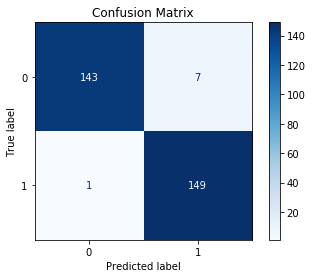

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

# Use ConfusionMatrixDisplay for a visual representation
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' ensures integer formatting
plt.title("Confusion Matrix")
plt.show()